# 인공신경망
실제 인간의 뇌에서 수행되는 신경망 방식을 사용한 컴퓨터 연산 방법   
실제 뇌에서 뉴런간 정보 전달 방식을 모델링한 것

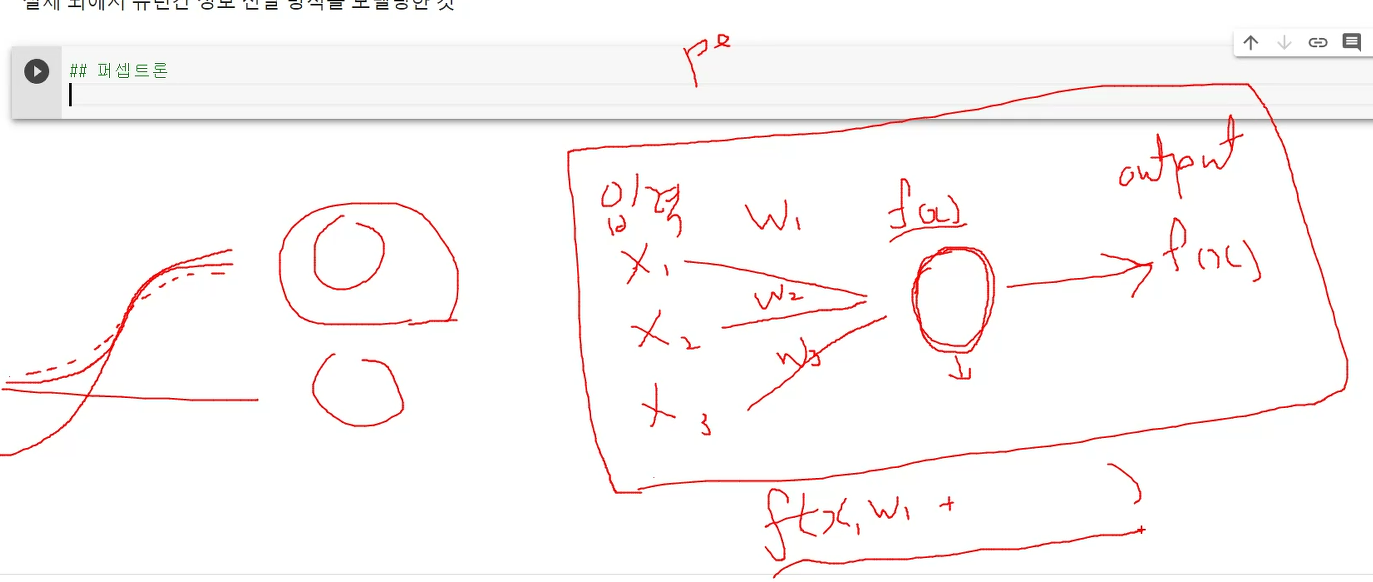

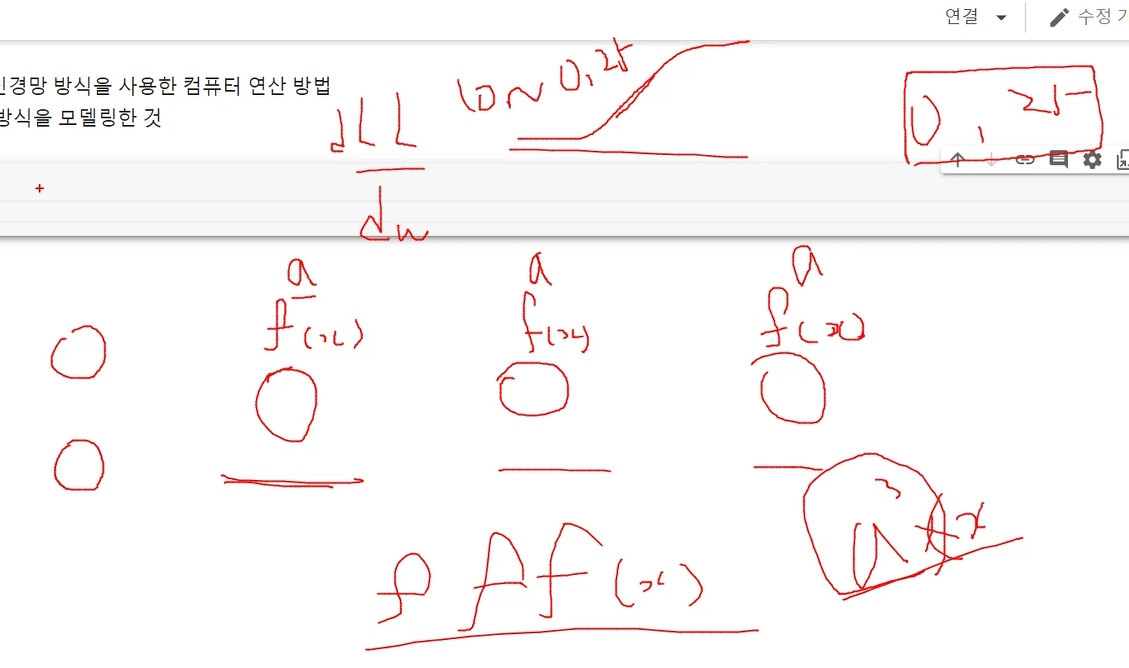

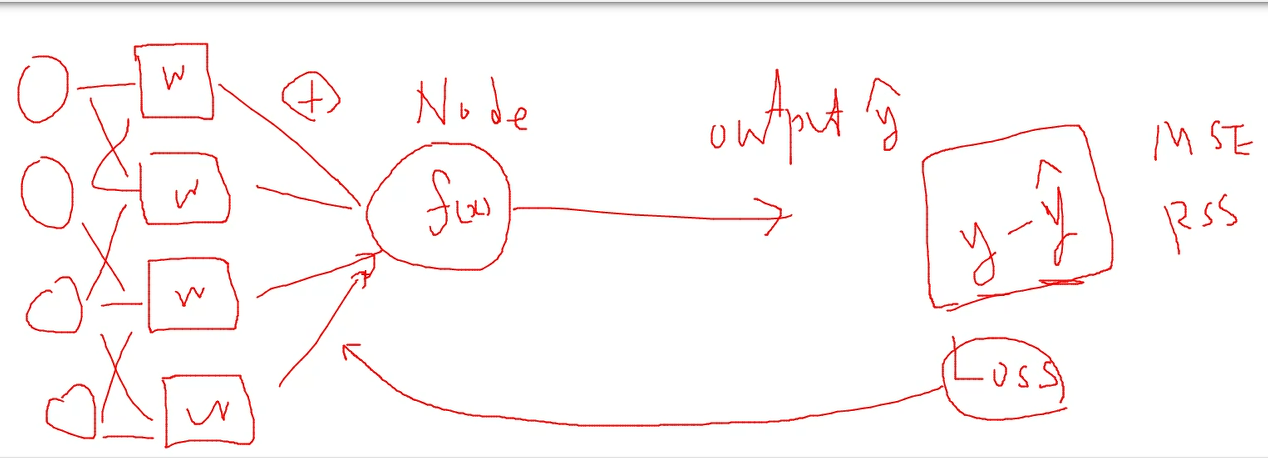

In [1]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: E850-3B9A

 C:\Users\user\Downloads\MSAISchool_Folder\강의\2022년12월1일 디렉터리

2022-12-01  오전 11:03    <DIR>          .
2022-12-01  오전 11:03    <DIR>          ..
2022-12-01  오전 09:07    <DIR>          .ipynb_checkpoints
2022-12-01  오전 11:03         1,112,531 2022년12월1일-통계기반데이터분석(8)-1(인공신경망).ipynb
2022-12-01  오전 09:34            17,541 data.csv
               2개 파일           1,130,072 바이트
               3개 디렉터리  205,918,814,208 바이트 남음


In [2]:
import pandas as pd
data = pd.read_csv("data.csv")

In [3]:
data

,x1,x2,y
0,True,True,False
1,True,False,True
2,True,False,True
3,True,True,False
4,True,True,False
...,...,...,...
995,True,True,False
996,True,True,False
997,False,True,True
998,False,False,False


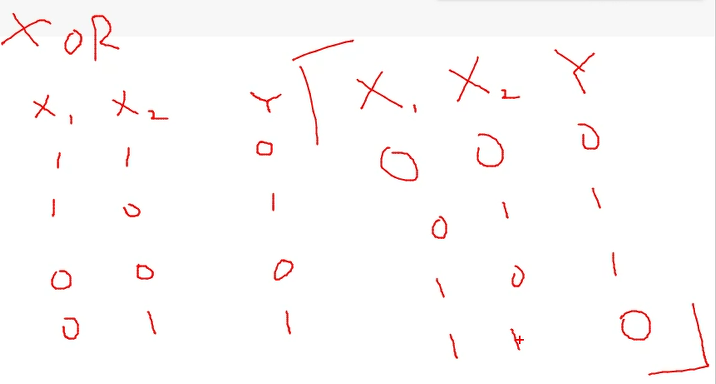

In [4]:
!pip install torch

In [5]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

# 여기서는 데이터를 생성하는 부분이다.
class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x1 = df.iloc[:, 0].values
    self.x2 = df.iloc[:,1].values
    self.y = df.iloc[:,2].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x1[index], self.x2[index]])
    y = torch.FloatTensor([self.y[index]])
    return x,y

  def __len__(self):
    return self.length


class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel, self).__init__()

    self.layer = nn.Sequential(
        nn.Linear(2,1), # 두개 들어와서 하나 나가는 뉴런을 생성해낸 것이다.
        nn.Sigmoid()
    )

  def forward(self, x):
    x = self.layer(x)
    return x

train_dataset = CustomDataset('data.csv')
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = CustomModel().to(device)
criterion = nn.BCELoss().to(device) # BCE은 두가지 로스가 있을 때 사용한다. y값이 연속된 실수일 때 사용한다.
optimizer = optim.SGD(model.parameters(), lr=0.01) # optimizer는 가중치를 최적화 시킬 때 어떤 방향으로 할지 하는 것

for epoch in range(10000):
  cost = 0.0
  for x,y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

with torch.no_grad():
  model.eval()
  input = torch.FloatTensor([
      [0,0],
      [0,1],
      [1,0],
      [1,1]
  ]).to(device)

  outputs = model(input)

print(outputs)

C:\Users\user\AppData\Local\Temp\ipykernel_9424\2841622221.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
C:\Users\user\AppData\Local\Temp\ipykernel_9424\2841622221.py:18: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.692
Epoch : 2000, Cost : 0.692
Epoch : 3000, Cost : 0.692
Epoch : 4000, Cost : 0.692
Epoch : 5000, Cost : 0.692
Epoch : 6000, Cost : 0.692
Epoch : 7000, Cost : 0.692
Epoch : 8000, Cost : 0.692
Epoch : 9000, Cost : 0.692
Epoch : 10000, Cost : 0.692
tensor([[0.4669],
        [0.4991],
        [0.5026],
        [0.5348]])


* 지금 하는 것은 퍼셉트론을 이용해서 단층 퍼셉트론을 해보는 것이다.
* 파이토치를 사용한다.

In [6]:
class fruit():
  def __init__(self) -> None:
    self._cnt = 0
    self._name = []

  def add_fruit(self, name, size):
     self._name.append(name)
     self._cnt += 1
     return True

  def set_fruit(self, new_name):
    self._name = new_name

  def get_item(self):
    return self._name

  def __len__(self):
    return self._cnt

In [7]:
fruit_class = fruit()

In [8]:
fruit_class.add_fruit('apple',10)
fruit_class.add_fruit('banana',10)
fruit_class.add_fruit('orange',10)

True

In [9]:
len(fruit_class)

3

In [10]:
dir(fruit_class)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cnt',
 '_name',
 'add_fruit',
 'get_item',
 'set_fruit']

In [11]:
fruit_class.get_item()

['apple', 'banana', 'orange']

In [12]:
fruit_class.name = ['1','2','3']

In [13]:
fruit_class.name

['1', '2', '3']

## 다층 퍼셉트론

In [14]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

# 여기서는 데이터를 생성하는 부분이다.
class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x1 = df.iloc[:, 0].values
    self.x2 = df.iloc[:,1].values
    self.y = df.iloc[:,2].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x1[index], self.x2[index]])
    y = torch.FloatTensor([self.y[index]])
    return x,y

  def __len__(self):
    return self.length


class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel, self).__init__()

    self.layer1 = nn.Sequential( # 레이어가 2개가 들어간다.
        nn.Linear(2,2), 
        nn.Sigmoid()
    )
    self.layer2 = nn.Sequential(
        nn.Linear(2,1), 
        nn.Sigmoid()
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    return x

train_dataset = CustomDataset('data.csv')
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = CustomModel().to(device)
criterion = nn.BCELoss().to(device) # BCE은 두가지 로스가 있을 때 사용한다. y값이 연속된 실수일 때 사용한다.
optimizer = optim.SGD(model.parameters(), lr=0.01) # optimizer는 가중치를 최적화 시킬 때 어떤 방향으로 할지 하는 것

for epoch in range(10000):
  cost = 0.0
  for x,y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

with torch.no_grad():
  model.eval()
  input = torch.FloatTensor([
      [0,0],
      [0,1],
      [1,0],
      [1,1]
  ]).to(device)

  outputs = model(input)

print(outputs)
print(outputs<=0.5)

C:\Users\user\AppData\Local\Temp\ipykernel_9424\1866433756.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
C:\Users\user\AppData\Local\Temp\ipykernel_9424\1866433756.py:18: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.693
Epoch : 2000, Cost : 0.693
Epoch : 3000, Cost : 0.692
Epoch : 4000, Cost : 0.671
Epoch : 5000, Cost : 0.484
Epoch : 6000, Cost : 0.135
Epoch : 7000, Cost : 0.050
Epoch : 8000, Cost : 0.029
Epoch : 9000, Cost : 0.021
Epoch : 10000, Cost : 0.016
tensor([[0.0170],
        [0.9858],
        [0.9858],
        [0.0169]])
tensor([[ True],
        [False],
        [False],
        [ True]])


In [2]:
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_12856\2987782820.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x >0, dtype=np.int)


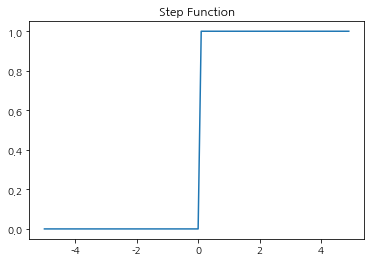

In [3]:
def step(x):
  return np.array(x >0, dtype=np.int)

x = np.arange(-5.0,5.0,0.1)
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

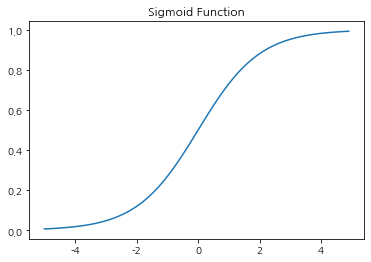

In [4]:
# 시크모이드 함수
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.title('Sigmoid Function')
plt.show()

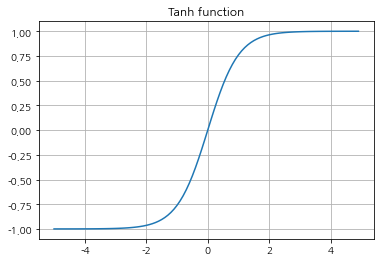

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)
plt.plot(x, y)
plt.grid()
plt.title('Tanh function')
plt.show()

* 적당선에서는 Sigmoid function보다 Tanh function을 사용한다고 하심.

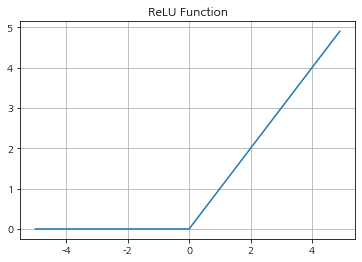

In [9]:
# ReLU
def relu(x):
  return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x,relu(x))
plt.grid()
plt.title('ReLU Function')
plt.show()

* ReLU와 같은 경우는 깊은 신경망에서도 잘 작동을 한다고 한다.

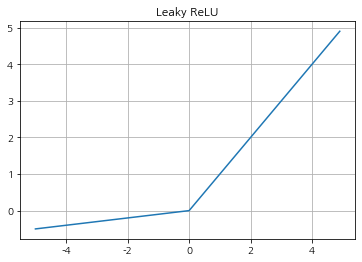

In [11]:
a = 0.1

def leaky_relu(x):
  return np.maximum(a*x,x)

plt.plot(x,leaky_relu(x))
plt.grid()
plt.title('Leaky ReLU')
plt.show()

* 음수의 값도 많이 살려주는 leaky ReLU이다.

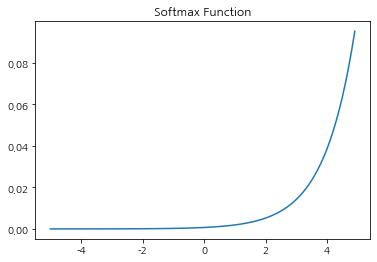

In [12]:
## Softmax
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)/np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

* 출력 레이어에 사용하는 함수이다.

# K-Nearest Neighbors

새로운 데이터(x)와 가장 가까운 k개의 데이터를 통해 x를 분류하는 방법
- euclidean distance
$$\sqrt{(x_1-\mu_1)^2 + (x_2-\mu_2)^2 + ... + (x_p-\mu_p)^2}$$

- manhatten distance
$$|x_1 -\mu_1| + |x_2 - \mu_2| + ... + |x_p - \mu_p|$$

    - 변수의 값이 가지는 스케일의 차이가 모델 학습에 영향을 미치는 것을 막기 위해 스케일링 수행이 필요
    - 각 변수의 값의 차이가 가졌던 정보는 남아 있도록 스케일링한다.
    

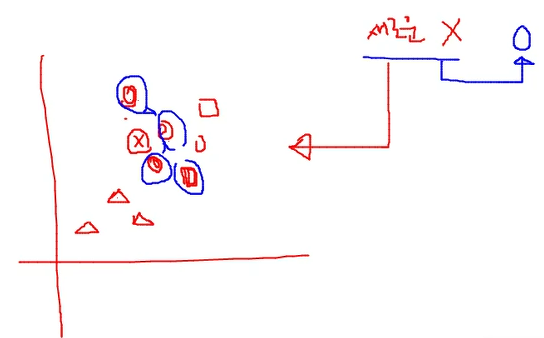

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import sklearn as sc

In [15]:
mobile_price = pd.read_csv('train.csv')
print(mobile_price.shape)
mobile_price.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [30]:
mobile_price['price_range'].head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [16]:
mobile_price.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [22]:
columns = mobile_price.columns

X = mobile_price[columns[:-1]]
y = mobile_price[columns[-1]]

SC = StandardScaler()
X = SC.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)
len(x_test[0])

20

In [23]:
print(len(x_train), len(x_test))

1800 200


In [28]:
for i in range(1, 13):
    knn_model=KNeighborsClassifier(n_neighbors=i,
                                   metric='manhattan').fit(x_train, y_train)
    print("{}번".format(i),knn_model.score(x_train, y_train))
    print(knn_model.score(x_test, y_test))
    print("===============================")

1번 1.0
0.37
2번 0.7388888888888889
0.425
3번 0.7316666666666667
0.435
4번 0.7422222222222222
0.53
5번 0.7311111111111112
0.545
6번 0.7277777777777777
0.605
7번 0.7233333333333334
0.61
8번 0.7255555555555555
0.625
9번 0.73
0.595
10번 0.7216666666666667
0.595
11번 0.7166666666666667
0.62
12번 0.7111111111111111
0.605


In [31]:
knn_model=KNeighborsClassifier(n_neighbors=8,
                                   metric='manhattan').fit(x_train, y_train)

In [33]:
knn_model.predict_proba(x_test)[0]

array([0.   , 0.125, 0.375, 0.5  ])

In [34]:
knn_model.predict(x_test)[0]

3

In [35]:
glass = pd.read_csv("glass.csv")

In [36]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


* 이러한 원소들이 합쳐 졌을 때, 어떠한 유리가 나오는가 하는 것이다.

In [38]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [42]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x1 = df.iloc[:, 0].values
    self.x2 = df.iloc[:,1].values
    self.x3 = df.iloc[:, 2].values
    self.x4 = df.iloc[:,3].values
    self.x5 = df.iloc[:, 4].values
    self.x6 = df.iloc[:,5].values
    self.x7 = df.iloc[:, 6].values
    self.x8 = df.iloc[:,7].values
    self.x9 = df.iloc[:,8].values
    self.y = df.iloc[:,9].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x1[index], self.x2[index],self.x3[index], 
                           self.x4[index],self.x5[index], self.x6[index],
                           self.x7[index], self.x8[index],self.x9[index]])
    y = torch.LongTensor(self.y-1)[index]
    return x,y

  def __len__(self):
    return self.length


class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Linear(9,256),
        nn.ReLU()
    )
    self.layer2 = nn.Sequential(
        nn.Linear(256,512),
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
        nn.Linear(512,128),
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(128,18),
        nn.ReLU()
    )
    self.output_layer = nn.Sequential(
        nn.Linear(18,7),
        nn.Softmax()
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    return x

train_dataset = CustomDataset('glass.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

#device = 'cuda'
device = 'cpu'
print(device)

model = CustomModel().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100000):
  cost = 0.0
  for x,y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

# with torch.no_grad():
#   model.eval()
#   print(glass[:10,:-1])
#   input = torch.FloatTensor([
#       [0,0],
#       [0,1],
#       [1,0],
#       [1,1]
#   ]).to(device)

#   outputs = model(input)

# print(outputs)
# print(outputs<=0.5)

cpu
Epoch : 1000, Cost : 6.238
Epoch : 2000, Cost : 6.238
Epoch : 3000, Cost : 6.238
Epoch : 4000, Cost : 6.238
Epoch : 5000, Cost : 6.238
Epoch : 6000, Cost : 6.238
Epoch : 7000, Cost : 6.238
Epoch : 8000, Cost : 6.238
Epoch : 9000, Cost : 6.238
Epoch : 10000, Cost : 6.238
Epoch : 11000, Cost : 6.238
Epoch : 12000, Cost : 6.238
Epoch : 13000, Cost : 6.238
Epoch : 14000, Cost : 6.238
Epoch : 15000, Cost : 6.238
Epoch : 16000, Cost : 6.238
Epoch : 17000, Cost : 6.238
Epoch : 18000, Cost : 6.238
Epoch : 19000, Cost : 6.238
Epoch : 20000, Cost : 6.238
Epoch : 21000, Cost : 6.238
Epoch : 22000, Cost : 6.238
Epoch : 23000, Cost : 6.238
Epoch : 24000, Cost : 6.238
Epoch : 25000, Cost : 6.238
Epoch : 26000, Cost : 6.238
Epoch : 27000, Cost : 6.238
Epoch : 28000, Cost : 6.238
Epoch : 29000, Cost : 6.238
Epoch : 30000, Cost : 6.238
Epoch : 31000, Cost : 6.238
Epoch : 32000, Cost : 6.238
Epoch : 33000, Cost : 6.238
Epoch : 34000, Cost : 6.238
Epoch : 35000, Cost : 6.238
Epoch : 36000, Cost : 6.2

KeyboardInterrupt: 

In [44]:
dataset = pd.read_csv('dataset.csv')['class'].unique()
dataset

array(['obtuse triangle', 'acute triangle', 'right triangle'],
      dtype=object)

In [47]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.a = df.iloc[:, 0].values
    self.b = df.iloc[:,1].values
    self.c = df.iloc[:, 2].values
    self.y = df.iloc[:, 3].values
    self.y = list(map(self.string_to_vector, self.y))
    self.length = len(df)

  def string_to_vector(self, value):
    key_value = {'obtuse triangle':2, 'acute triangle':1, 'right triangle':0}
    return key_value[value]

  def __getitem__(self, index):
    x = torch.FloatTensor(sorted([self.a[index], self.b[index], self.c[index]]))
    y = torch.LongTensor(self.y)[index]
    return x,y

  def __len__(self):
    return self.length

class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel, self).__init__()

    self.layer = nn.Sequential(
        nn.Linear(3, 3)
    )
  def forward(self,x):
    return self.layer(x)

train_dataset = CustomDataset('dataset.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)
device = 'cpu'
model = CustomModel().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10000):
  cost = 0.0
  for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')


Epoch : 1000, Cost : 0.211
Epoch : 2000, Cost : 0.139
Epoch : 3000, Cost : 0.102
Epoch : 4000, Cost : 0.080


KeyboardInterrupt: 

In [ ]:
with torch.no_grad():
  model.eval()
  classes = {2:'obtuse triangle', 1:'acute triangle', 0:'right triangle'}
  inputs = torch.FloatTensor(
      [
          [3.0,4.0,5.0],
       [3, 3, 3]
       
      ]
  ).to(device)

In [ ]:
outputs = model(inputs)

In [ ]:
import torch.nn.functional as F
print(torch.round(F.softmax(outputs, dim=1), decimals=2))
print(outputs.argmax(1))
print(list(map(classes.get, outputs.argmax(1).tolist())))